In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os


#path = 'C:\\Users\Aichou Diallo\Dropbox\Project-1\Aissa'
file = '../cleaned_stock_market.csv'
df = pd.read_csv(file)

#data = pd.read_csv("cleaned_stock_market.csv", encoding='utf-8')

# Read in the stock market data
#data = pd.read_csv("cleaned_stock_market.csv")

# Sort the data by closing price in descending order
#data = data.sort_values('close', ascending=False)

# Get the top 10 stocks
# top_10_data = data.head(10)

# # Plot the line chart
# for index, row in top_10_data.iterrows():
#     plt.plot(row['date'], row['close'], label=row['symbol'])

# # Add labels and title
# plt.xlabel('Date')
# plt.ylabel('Closing Price')
# plt.title('Top 10 highest closing prices of stock market')

# # Add the legend
# plt.legend(loc='upper left')

# # Show the plot
# plt.show()

df.head(20)




,symbol,year,month,close
0,AAAU,2020,7,17.709999
1,AAAU,2020,7,17.680000
2,AAAU,2020,6,17.780001
3,AAAU,2020,6,17.680000
4,AAAU,2020,6,17.670000
5,AAAU,2020,6,17.590000
6,AAAU,2020,6,17.610001
7,AAAU,2020,6,17.660000
8,AAAU,2020,6,17.500000
9,AAAU,2020,6,17.400000


In [23]:
df['year'].value_counts()

2019    217469
2018    198425
2017    182812
2016    171609
2015    161539
2020    116721
Name: year, dtype: int64

In [28]:
avg_close=df.groupby(["symbol","year"]).mean()["close"]
top_ten=avg_close.sort_values(ascending=False)[0:10]
avg=pd.DataFrame(avg_close)
avg.head(50)
# top_ten

close
symbol year            
AAAU   2018   12.171579
       2019   13.920317
       2020   16.474961
AACG   2019    1.931699
       2020    1.025039
AADR   2015   38.491495
       2016   38.953017
       2017   50.131394
       2018   54.197490
       2019   47.813492
       2020   48.989291
AAL    2015   45.122103
       2016   38.183849
       2017   47.490717
       2018   42.801952
       2019   30.879326
       2020   17.341260
AAMC   2015  127.048135
       2016   20.638968
       2017   79.672500
       2018   59.604256
       2019   19.511446
       2020   15.810574
AAME   2015    4.009426
       2016    3.970946
       2017    3.622696
       2018    2.892035
       2019    2.420871
       2020    2.027373
AAN    2015   32.269762
       2016   24.925794
       2017   36.577649
       2018   45.544143
       2019   58.283532
       2020   39.863937
AAOI   2015   16.208810
       2016   16.445853
       2017   53.216574
       2018   31.517709
       2019   11.577639
       2020    9.861271
AAON   2015   22.658810
       2016   27.268056
       2017   34.992630
       2018   35.963864
       2019   46.079484
       2020   51.363543
AAP    2015  163.647262
       2016  155.488135
       2017  122.574861

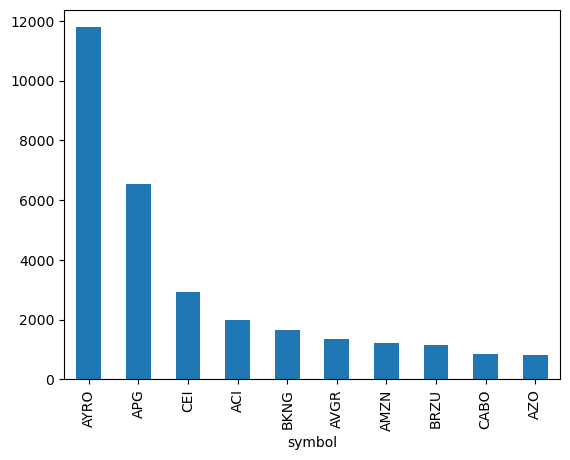

In [20]:
top_ten.plot(kind='bar')



plt.savefig("../top_10_avg_close.png")
plt.show()

In [3]:
#  matplotlib.pyplot as plt
# i# Dependencies and Setup
# importmport pandas as pd
# import scipy.stats as st
# import numpy as np
# import seaborn as sns
# from scipy.stats import linregress


# # Study data files
# cleaned_stock_market_path = "data/cleaned_stock_market.csv"
# CPI_2002_2022_path = "data/CPI_2002_2022.csv"

# # Read the stock market and CPI 2002 to 2022 results
# cleaned_stock_market = pd.read_csv(cleaned_stock_market_path)
# CPI_2002_2022 = pd.read_csv(CPI_2002_2022_path)

# # Combine the data into a single dataset
# Combined_data = pd.merge(cleaned_stock_market, CPI_2002_2002_path, how='outer')


# # Display the data table for preview
# Combined_data.head()
